In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['source'] = 'train'
test_df['source'] = 'test'

full_df = pd.concat([train_df, test_df], axis=0)

In [7]:
full_df.drop(columns =['Cabin'], inplace = True)
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,train


In [8]:
full_df.describe()
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
 11  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
## fixing null values in Age
median_age = full_df['Age'].median()
full_df['Age'] = full_df['Age'].fillna(median_age)
full_df.head(5)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
 11  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
#dropping null columns in embarked
full_df['Embarked'] = full_df['Embarked'].fillna(full_df['Embarked'].mode()[0])
full_df.info()
full_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1309 non-null   object 
 11  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.503186,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,12.905241,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
full_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,train


In [12]:
full_df.drop(columns =['Ticket'], inplace = True)
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,train


In [13]:
full_df['Embarked'].unique()
#S = Southampton
#C = Cherbourg
#Q = Queenstown

array(['S', 'C', 'Q'], dtype=object)

In [14]:
#one hot encoding for embarked
one_hot = pd.get_dummies(full_df['Embarked'])
full_df = pd.concat([full_df, one_hot], axis=1)

full_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,source,C,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,train,False,False,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,train,True,False,False
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,train,False,False,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,train,False,False,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,train,False,False,True


In [15]:
#converting sex using encoding
le = LabelEncoder()
full_df['sex_label'] = le.fit_transform(full_df['Sex'])

#1 ->male   0 -> female
full_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,source,C,Q,S,sex_label
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,train,False,False,True,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,train,True,False,False,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,train,False,False,True,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,train,False,False,True,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,train,False,False,True,1


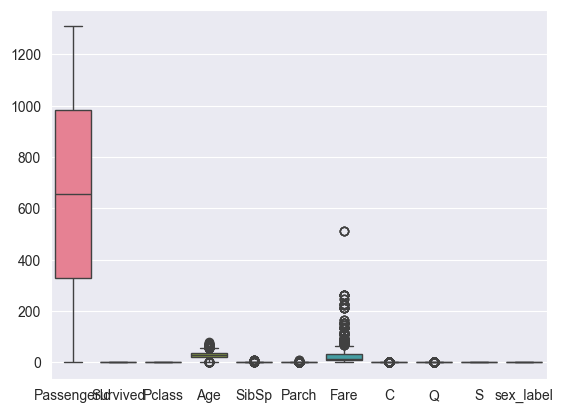

In [16]:
sns.boxplot(data = full_df)
plt.show()

In [17]:
#more outlier detection
Q1 = full_df['Fare'].quantile(0.25)
Q3 = full_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = full_df[(full_df['Fare'] < (Q1 - 1.5 * IQR)) | (full_df['Fare'] > (Q3 + 1.5 * IQR))]
outliers.shape


(171, 15)

In [18]:
#group by
full_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [19]:
full_df.duplicated().sum()

0

In [20]:
full_df.isnull().sum()


PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Embarked         0
source           0
C                0
Q                0
S                0
sex_label        0
dtype: int64

In [21]:
full_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,source,C,Q,S,sex_label
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,train,False,False,True,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,train,True,False,False,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,train,False,False,True,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,train,False,False,True,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,train,False,False,True,1


In [22]:
#Feature Engineering
full_df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1308 non-null   float64
 9   Embarked     1309 non-null   object 
 10  source       1309 non-null   object 
 11  C            1309 non-null   bool   
 12  Q            1309 non-null   bool   
 13  S            1309 non-null   bool   
 14  sex_label    1309 non-null   int32  
 15  Family_Size  1309 non-null   int64  
dtypes: bool(3), float64(3), int32(1), int64(5), object(4)
memory usage: 141.9+ KB


In [23]:
full_df["Alone"] = np.where(full_df["Family_Size"] == 1,1,0)


In [24]:
#Fare per person
full_df['FarePerPerson'] = full_df['Fare'] / (full_df['Family_Size'] + 1)
full_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,source,C,Q,S,sex_label,Family_Size,Alone,FarePerPerson
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,train,False,False,True,1,2,0,2.416667
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,train,True,False,False,0,2,0,23.761100
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,train,False,False,True,0,1,1,3.962500
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,train,False,False,True,0,2,0,17.700000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,train,False,False,True,1,1,1,4.025000


In [25]:
full_df['AgeGroup'] = pd.cut(full_df['Age'], bins=[0, 12, 18, 30, 50, 80],
                            labels=['Child', 'Teen', 'Adult', 'Mid-Age', 'Senior'])
le = LabelEncoder()
full_df['AgeGroup'] = le.fit_transform(full_df['AgeGroup'])
full_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,source,C,Q,S,sex_label,Family_Size,Alone,FarePerPerson,AgeGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,train,False,False,True,1,2,0,2.416667,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,train,True,False,False,0,2,0,23.761100,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,train,False,False,True,0,1,1,3.962500,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,train,False,False,True,0,2,0,17.700000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,train,False,False,True,1,1,1,4.025000,2


In [26]:
full_df['Title'] = full_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
full_df['Title'] = full_df['Title'].fillna('Other')
print(full_df['Title'].unique())


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer' 'Dona']


In [27]:
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
               'Major', 'Rev', 'Sir', 'Jonkheer', 'Mme', 'Ms', 'Mlle']

full_df['Title'] = full_df['Title'].replace(rare_titles, 'Other')
print(full_df['Title'].unique())


['Mr' 'Mrs' 'Miss' 'Master' 'Other' 'Dona']


In [28]:
title_encoder = LabelEncoder()
full_df['Title'] = title_encoder.fit_transform(full_df['Title'])
full_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,source,C,Q,S,sex_label,Family_Size,Alone,FarePerPerson,AgeGroup,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,train,False,False,True,1,2,0,2.416667,0,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,train,True,False,False,0,2,0,23.761100,2,4
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,train,False,False,True,0,1,1,3.962500,0,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,train,False,False,True,0,2,0,17.700000,2,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,train,False,False,True,1,1,1,4.025000,2,3


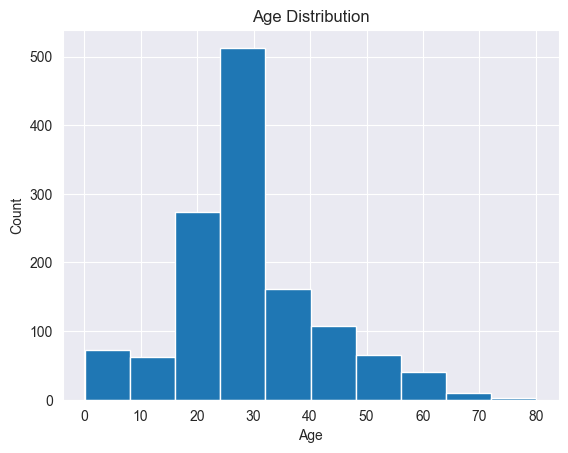

In [29]:
#Age varation in the titanic
full_df['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

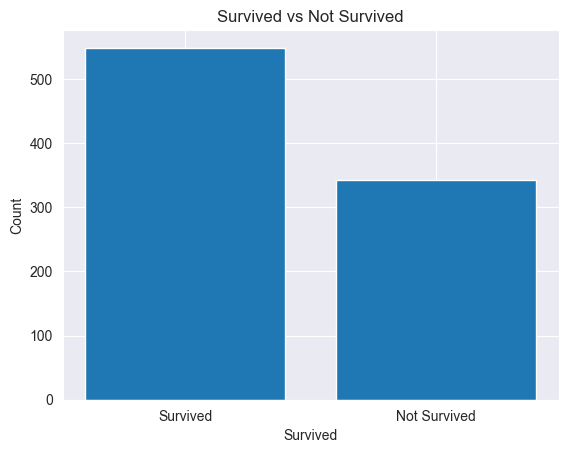

In [30]:
#How many survived?
plt.hist(full_df['Survived'],bins=[-0.5, 0.5, 1.5],rwidth=0.8)
plt.xticks([0,1],['Survived', 'Not Survived'])
plt.title('Survived vs Not Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

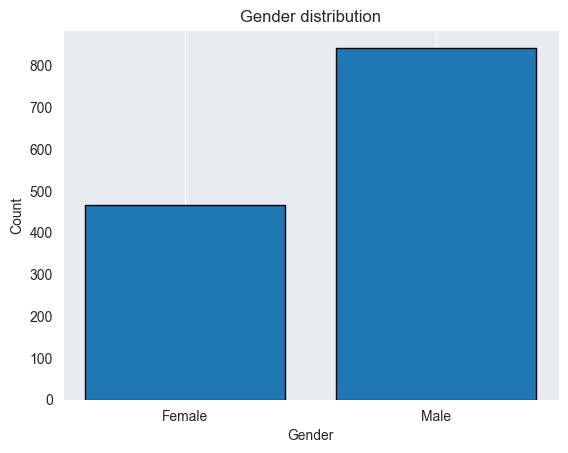

In [31]:
#Gender Distribution
plt.hist(full_df['sex_label'], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

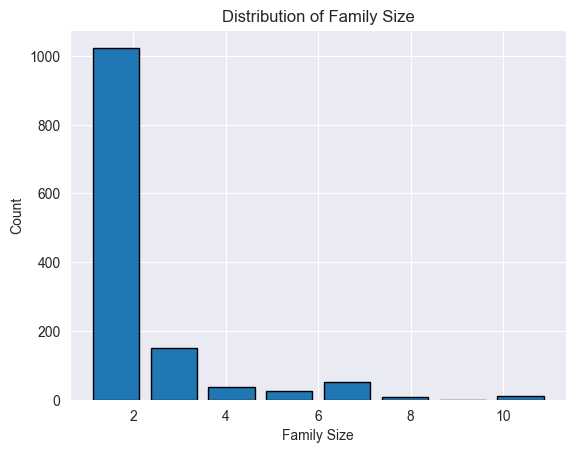

In [32]:
#different family size
plt.hist(full_df['Family_Size'],bins = 8, edgecolor='black', rwidth=0.8)
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')

plt.show()

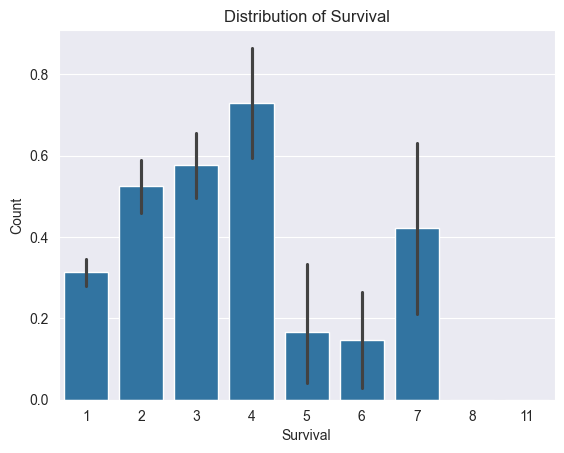

In [33]:
#Bi - Variant Analysis
#familySize vs survived
sns.barplot(data = full_df, x = 'Family_Size', y = 'Survived')
plt.title('Distribution of Survival')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

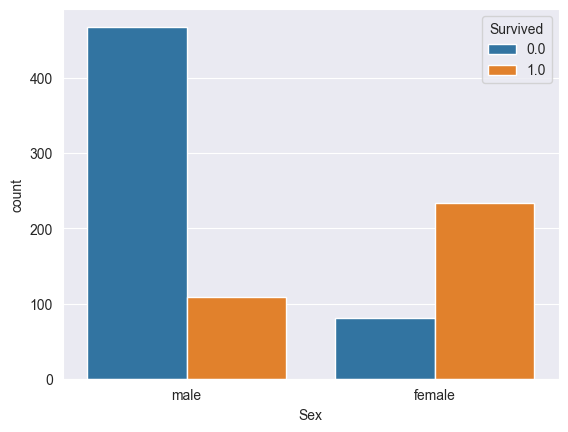

In [34]:
#survival based on sex
sns.countplot(data=full_df, x='Sex', hue='Survived')
plt.show()


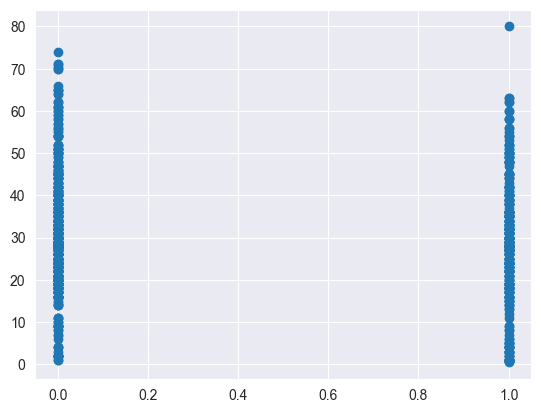

In [35]:
#survival across different ages
plt.scatter( full_df['Survived'],full_df['Age'] )
plt.show()

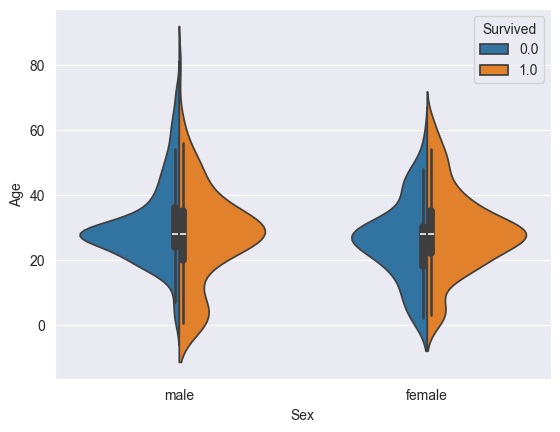

In [36]:
sns.violinplot(data=full_df, x='Sex', y='Age', hue='Survived', split=True)
plt.show()

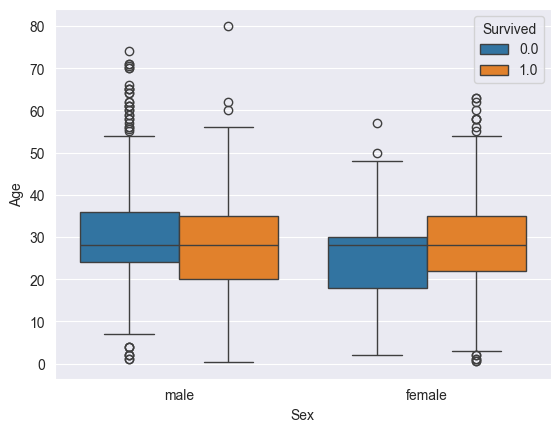

In [37]:
sns.boxplot(data=full_df, x='Sex', y='Age', hue='Survived')
plt.show()

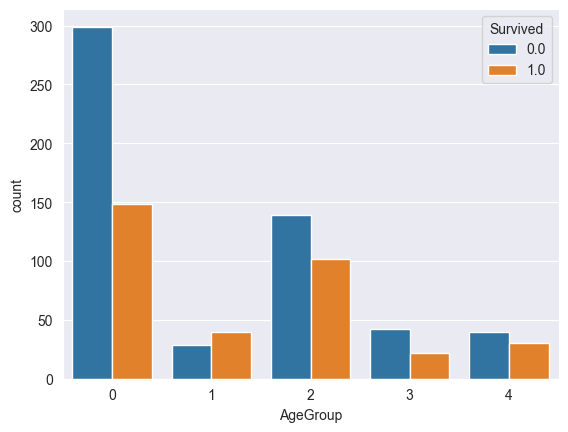

In [38]:
sns.countplot(data=full_df, x='AgeGroup', hue='Survived')
plt.show()

In [39]:
#splitting the data back into test and train
train_df = full_df[full_df['source'] == 'train'].drop(['source'], axis=1)
test_df = full_df[full_df['source'] == 'test'].drop(['source', 'Survived'], axis=1)


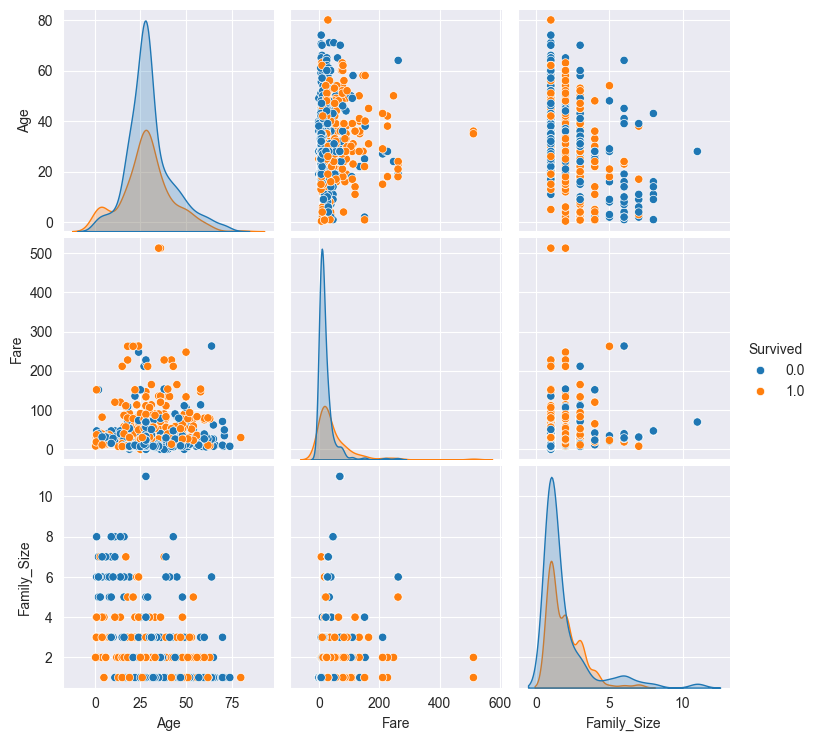

In [40]:
sns.pairplot(train_df[['Age', 'Fare', 'Survived', 'Family_Size']], hue='Survived')
plt.show()


In [41]:
train_df.drop(columns =['Name','Sex','Embarked'], inplace = True)
test_df.drop(columns =['Name','Sex','Embarked'], inplace = True)
test_df.head(5)



,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,sex_label,Family_Size,Alone,FarePerPerson,AgeGroup,Title
0,892,3,34.5,0,0,7.8292,False,True,False,1,2,0,2.609733,2,3
1,893,3,47.0,1,0,7.0000,False,False,True,0,2,0,2.333333,2,4
2,894,2,62.0,0,0,9.6875,False,True,False,1,1,1,4.843750,3,3
3,895,3,27.0,0,0,8.6625,False,False,True,1,2,0,2.887500,0,3
4,896,3,22.0,1,1,12.2875,False,False,True,0,1,1,6.143750,0,4


In [42]:
imputer = SimpleImputer(strategy='median')

test_df[['Fare', 'FarePerPerson']] = imputer.fit_transform(test_df[['Fare', 'FarePerPerson']])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Age            418 non-null    float64
 3   SibSp          418 non-null    int64  
 4   Parch          418 non-null    int64  
 5   Fare           418 non-null    float64
 6   C              418 non-null    bool   
 7   Q              418 non-null    bool   
 8   S              418 non-null    bool   
 9   sex_label      418 non-null    int32  
 10  Family_Size    418 non-null    int64  
 11  Alone          418 non-null    int32  
 12  FarePerPerson  418 non-null    float64
 13  AgeGroup       418 non-null    int32  
 14  Title          418 non-null    int32  
dtypes: bool(3), float64(3), int32(4), int64(5)
memory usage: 37.1 KB


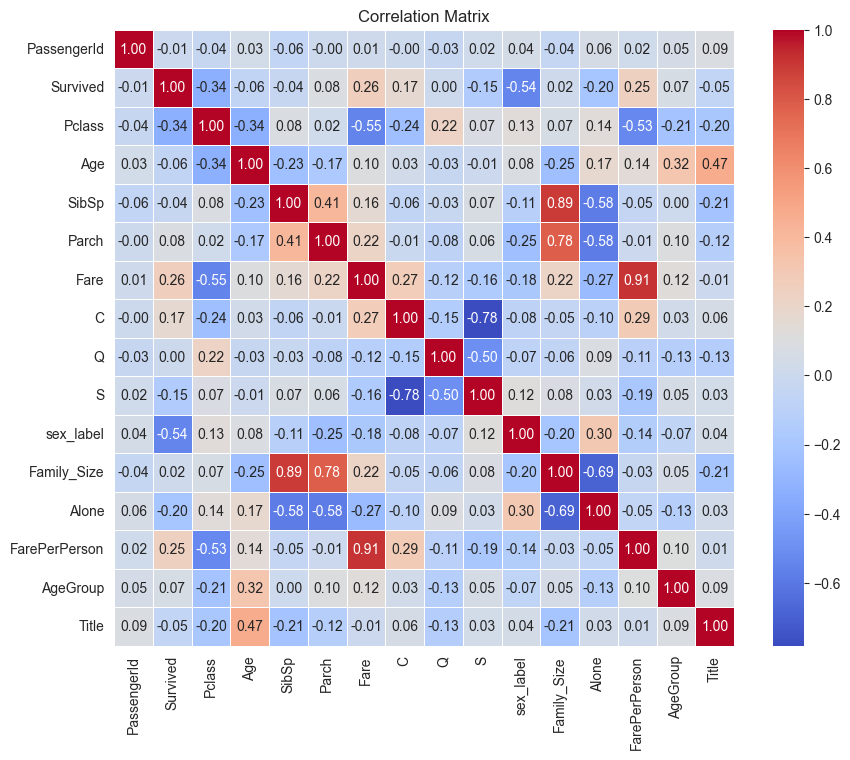

In [43]:
corr_matrix = train_df.corr(numeric_only=True)  # Use numeric_only if dataframe has categorical columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [44]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df  # Already doesn't have 'Survived'


In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [47]:
y_pred_train = model.predict(X_train)
print("Accuracy on training data:", accuracy_score(y_train, y_pred_train))


Accuracy on training data: 0.8103254769921436


In [48]:
# Features and labels from cleaned train_df
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']


In [49]:
# Already cleaned X_test (test_df without 'Survived')
y_pred_test = model.predict(X_test)


In [50]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],  # you MUST have kept this column safe
    'Survived': y_pred_test
})

submission.to_csv("submission.csv", index=False)


In [51]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
y_pred_test = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred_test
})

submission['Survived'] = submission['Survived'].astype(int)  # 👈 Add this line
submission.to_csv("submission1.csv", index=False)
